In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [3]:
#Extracting independent and dependent features 
X = data.iloc[:,:-1]
y = data.iloc[:,-1:]

In [4]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [5]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [6]:
#feature scaling
from sklearn.preprocessing import StandardScaler

st = StandardScaler()

X = st.fit_transform(X)
X

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [7]:
#splitting into training and testing
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [8]:
#fitting K-NN classifer
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)

model.fit(X_train,y_train)

c:\Users\Nishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [9]:
#We can see that KNN classifier is giving better results than Logistic Regression on the same dataset
model.score(X_test,y_test)

0.9375

In [10]:
y_pred = model.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)


Text(70.72222222222221, 0.5, 'Truth values')

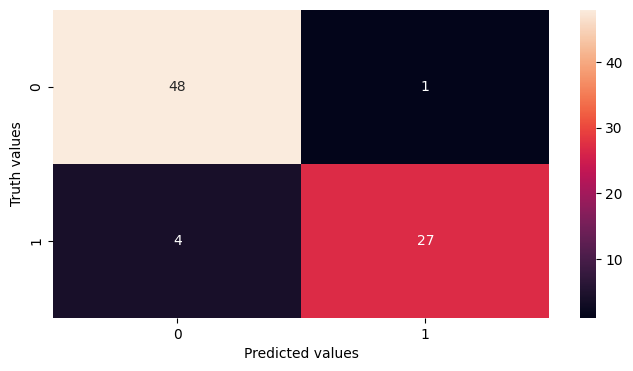

In [12]:
#Visualizing results through confusion matrix
import seaborn as sn 
plt.figure(figsize=(8,4))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Truth values')

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        52
           1       0.87      0.96      0.92        28

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80

